In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import itti_koch_niebur_nengo as iknn

In [2]:
img = cv2.imread('../../tests/test_data/img/test3.jpg')

In [3]:
pyramid = iknn.features.gaussian_pyramid(img)

In [4]:
pyramid_rgb = [iknn.utils.BGR2RGB(level) for level in pyramid]

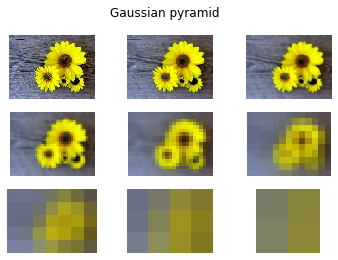

In [5]:
fig, ax = plt.subplots(3, 3)
ax = ax.ravel()
for ind, level in enumerate(pyramid_rgb):
    ax[ind].imshow(level)
    ax[ind].set_axis_off()
plt.suptitle('Gaussian pyramid');

In [6]:
[R, G, B, Y, I] = iknn.features.get_channels(img)

In [7]:
I_maps = iknn.features.intensity_ftr_maps(I)

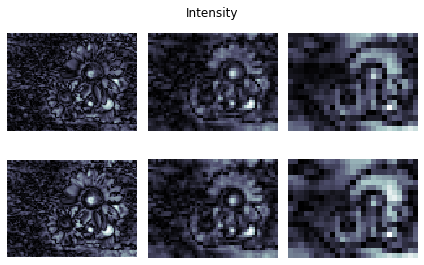

In [8]:
fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
for ind, I_map in enumerate(I_maps):
    ax[ind].imshow(I_map, cmap='bone')
    ax[ind].set_axis_off()
plt.suptitle('Intensity');
plt.tight_layout()

In [9]:
RG_maps, BY_maps = iknn.features.color_ftr_maps(R, G, B, Y)

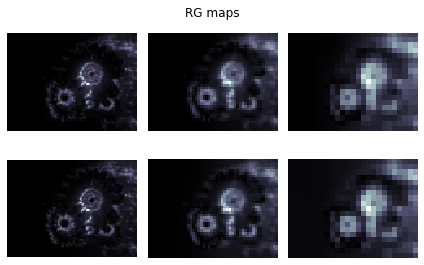

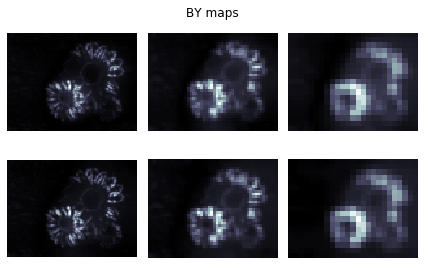

In [10]:
fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
for ind, RG_map in enumerate(RG_maps):
    ax[ind].imshow(RG_map, cmap='bone')
    ax[ind].set_axis_off()
plt.suptitle('RG maps');
plt.tight_layout();

fig, ax = plt.subplots(2, 3)
ax = ax.ravel()
for ind, BY_map in enumerate(BY_maps):
    ax[ind].imshow(BY_map, cmap='bone')
    ax[ind].set_axis_off()
plt.suptitle('BY maps');
plt.tight_layout();

In [11]:
O_maps = iknn.features.orientation_ftr_maps(I)

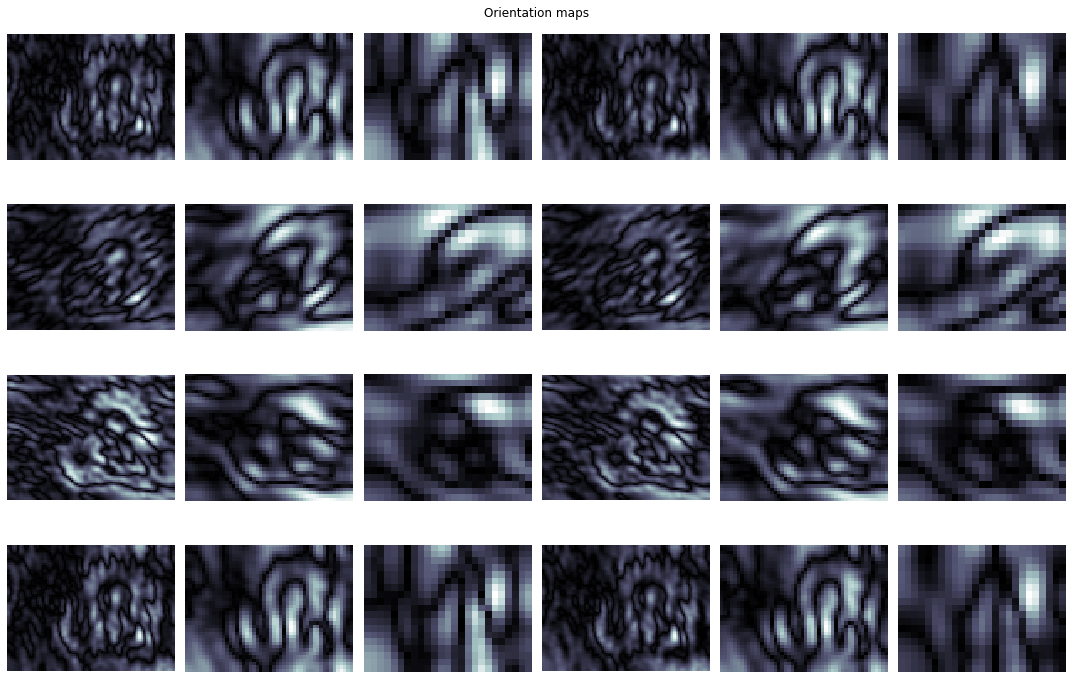

In [12]:
fig, ax = plt.subplots(4, 6)
fig.set_size_inches(15, 10)
ax = ax.ravel()
for ind, O_map in enumerate(O_maps):
    ax[ind].imshow(O_map, cmap='bone')
    ax[ind].set_axis_off()    
plt.suptitle('Orientation maps');
plt.tight_layout();

In [13]:
S_sigma = 3
height, width = I_maps[S_sigma].shape[:2]

I_bar = iknn.visual_cortex.saliency.I_conspicuity(
    I_maps, width, height
)

C_bar = iknn.visual_cortex.saliency.C_conspicuity(
    RG_maps, BY_maps, width, height
)

O_bar = iknn.visual_cortex.saliency.O_conspicuity(
    O_maps, width, height
)


In [14]:
C_bar.shape

(75, 100)

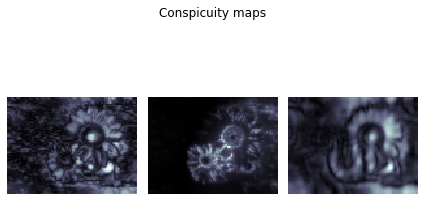

In [15]:
fig, ax = plt.subplots(1, 3)
ax = ax.ravel()

for ind, c_map in enumerate([I_bar, C_bar, O_bar]):
        ax[ind].imshow(c_map, cmap='bone')
        ax[ind].set_axis_off()    
plt.suptitle('Conspicuity maps');
plt.tight_layout();

In [16]:
S = iknn.visual_cortex.saliency.compute_S(I_bar, C_bar, O_bar)

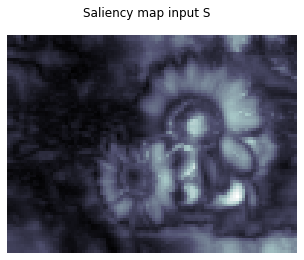

In [17]:
fig, ax = plt.subplots()

ax.imshow(S, cmap='bone')
ax.set_axis_off()    
plt.suptitle('Saliency map input S');

In [18]:
S_to_compare = iknn.visual_cortex.saliency.img_to_S(img)

In [19]:
np.array_equal(S, S_to_compare)

True